In [4]:
def finite_diff_weights(x, x0, n):
    N = len(x)
    c = np.zeros((N, n+1))
    c1 = 1.0
    c4 = x[0] - x0
    c[0, 0] = 1.0
    for i in range(1, N):
        mn = min(i, n)
        c2 = 1.0
        c5 = c4
        c4 = x[i] - x0
        for j in range(i):
            c3 = x[i] - x[j]
            c2 *= c3
            for k in range(mn, 0, -1):
                c[i, k] = (c4 * c[i-1, k] - k * c[i-1, k-1]) / c3
            c[i, 0] = (c4 * c[i-1, 0]) / c3
            for k in range(mn, 0, -1):
                c[j, k] = (c5 * c[j, k] - k * c[j, k-1]) / c3
            c[j, 0] = (c5 * c[j, 0]) / c3
        c1 = c2
    return c


In [6]:
x = np.array([-2, -1, 0, 1, 2])
x0 = 0
order = 4

weights_matrix = finite_diff_weights(x, x0, order)
for d in range(1, order+1):
    print(f"Derivative order {d} weights:", weights_matrix[:, d])


Derivative order 1 weights: [-0.08333333 -0.16666667  0.          1.          2.        ]
Derivative order 2 weights: [-0.08333333 -0.33333333 -1.         -2.         -2.        ]
Derivative order 3 weights: [  0.5   1.    0.   -6.  -12. ]
Derivative order 4 weights: [ 1.  4. 12. 24. 24.]


In [1]:
from numdifftools.fornberg import fd_weights

In [4]:
from numdifftools.fornberg import fd_weights
import numpy as np

x = np.array([-2, -1, 0, 1, 2])  # Example stencil
n = 4  # Derivative order
weights = fd_weights(x, x0=0, n=n)  # Weights for 4th derivative at x0=0

print("4th derivative weights:", weights)


4th derivative weights: [ 1. -4.  6. -4.  1.]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numdifftools.fornberg import fd_weights_all

In [38]:
def vectorized_taylor_fractional_delay(Q, delta, N, stencil_points):
    Q = np.asarray(Q).flatten()
    x = np.array(stencil_points)
    weights_matrix = fd_weights_all(x, x0=0, n=N)  # Shape: (N+1, len(stencil))
    
    num_samples = len(Q)
    Q_shifted = np.zeros(num_samples)
    max_offset = int(max(abs(x)))
    
    Q_padded = np.pad(Q, (max_offset, max_offset), mode='constant', constant_values=0)
    indices_matrix = (np.arange(num_samples)[:, None] + x[None, :] + max_offset)
    samples_matrix = Q_padded[indices_matrix]  # Shape: (num_samples, len(stencil))
    
    for k in range(0, N+1):
        weights = weights_matrix[k]  # Correct shape: (len(stencil),)
        derivative_k = samples_matrix @ weights  # Matrix multiplication
        Q_shifted += (delta**k) / factorial(k) * derivative_k
    
    return Q_shifted

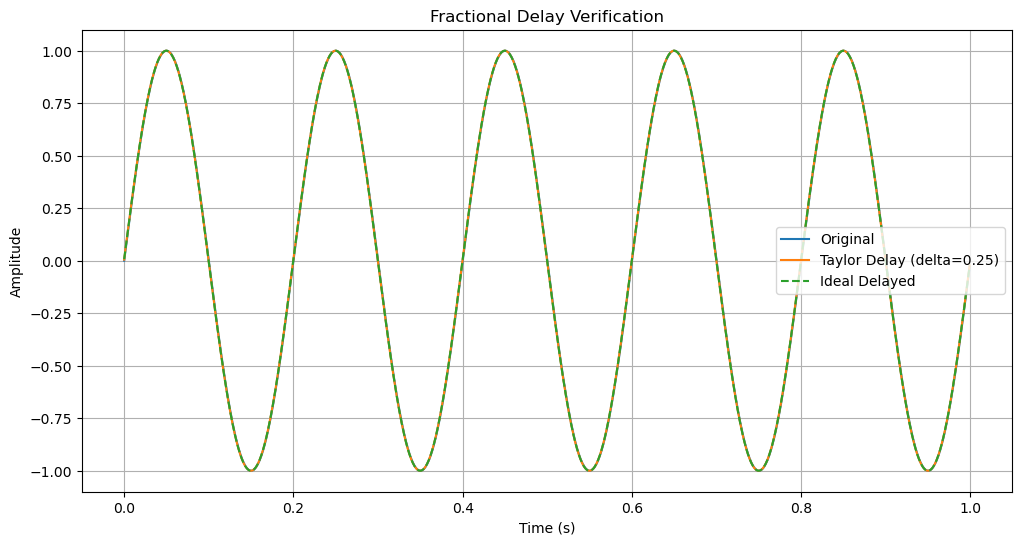

Max Error: 2.792e-03, Mean Error: 4.019e-06


In [41]:


# Test signal (example: sine wave)
fs = 1000  # Sampling frequency (Hz)
T = 1/fs   # Sampling interval
f = 5      # Frequency (Hz)
t = np.arange(1000) * T
Q = np.sin(2 * np.pi * f * t)

# Fractional delay (delta in samples, e.g. T/4 = 0.25)
delta = 0.25
order = 4
stencil = [-2, -1, 0, 1, 2]
N = len(stencil) // 2

# Pad the signal periodically outside the function
Q_shifted = vectorized_taylor_fractional_delay(Q, delta, order, stencil)

# Ideal (continuous) delayed signal
t_shifted = t + delta * T  # Shift time
Q_ideal = np.sin(2 * np.pi * f * t_shifted)

# Error
error = np.abs(Q_shifted - Q_ideal)

# Plot comparison
plt.figure(figsize=(12,6))
plt.plot(t, Q, label="Original")
plt.plot(t, Q_shifted, label=f"Taylor Delay (delta={delta})")
plt.plot(t, Q_ideal, '--', label="Ideal Delayed")
plt.legend()
plt.title("Fractional Delay Verification")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Check error metrics
max_error = np.max(error)
mean_error = np.mean(error)
print(f"Max Error: {max_error:.3e}, Mean Error: {mean_error:.3e}")


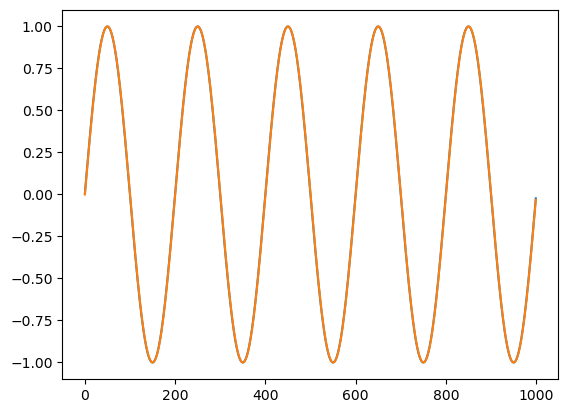

In [42]:
plt.plot(Q_shifted)
plt.plot(Q)

In [43]:
Q_true_shifted = np.sin(2 * np.pi * f * (n + delta) / fs)
error = np.abs(Q_true_shifted - Q_shifted)
print(error)

[2.79191581e-03 5.36804730e-04 2.34830599e-10 2.34240960e-10
 2.33420117e-10 2.32369013e-10 2.31088509e-10 2.29579994e-10
 2.27844799e-10 2.25884811e-10 2.23702112e-10 2.21298369e-10
 2.18676244e-10 2.15838403e-10 2.12787621e-10 2.09526729e-10
 2.06059059e-10 2.02388106e-10 1.98517314e-10 1.94450789e-10
 1.90192195e-10 1.85745974e-10 1.81116566e-10 1.76308190e-10
 1.71325842e-10 1.66174519e-10 1.60858993e-10 1.55385149e-10
 1.49757540e-10 1.43982382e-10 1.38065226e-10 1.32011402e-10
 1.25827682e-10 1.19519727e-10 1.13093424e-10 1.06555986e-10
 9.99131888e-11 9.31720257e-11 8.63384919e-11 7.94201371e-11
 7.24230675e-11 6.53548327e-11 5.82218718e-11 5.10316234e-11
 4.37910819e-11 3.65069086e-11 2.91870972e-11 2.18383089e-11
 1.44680934e-11 7.08355596e-12 3.07975867e-13 7.69939668e-12
 1.50829349e-11 2.24515961e-11 2.97983860e-11 3.71155329e-11
 4.43961534e-11 5.16329202e-11 5.88187277e-11 6.59463595e-11
 7.30091543e-11 7.99996736e-11 8.69113670e-11 9.37374622e-11
 1.00470521e-10 1.071049